## Importar librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga de datos

In [ ]:
mov = pd.read_csv("movil_cl.csv", sep=";")
mov.head()

,Id,Sexo,Estado_Civil,nse,N_llamadas,Minutos_Consum,Antig_Cliente,Plan,Producto,Flag_Comp
0,1,Femenino,Divorciado,A,28.0,750.0,3.0,6,Pospago,0
1,2,Femenino,Divorciado,C,4.0,324.0,14.0,4,Migrado,1
2,3,Femenino,Soltero,D,20.0,101.0,9.0,6,Control,0
3,4,Masculino,Casado,A,14.0,141.0,29.0,5,Control,0
4,5,Femenino,Soltero,C,6.0,57.0,8.0,2,Migrado,0


## Codificación One-Hot para columnas categóricas

In [ ]:
categorical_columns = ["Sexo", "Estado_Civil", "nse", "Producto"]
mov_encoded = pd.get_dummies(mov, columns = categorical_columns)
mov_encoded.head()

,Id,N_llamadas,Minutos_Consum,Antig_Cliente,Plan,Flag_Comp,Sexo_Femenino,Sexo_Masculino,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero,nse_A,nse_B,nse_C,nse_D,Producto_Control,Producto_Migrado,Producto_Pospago
0,1,28.0,750.0,3.0,6,0,1,0,0,1,0,1,0,0,0,0,0,1
1,2,4.0,324.0,14.0,4,1,1,0,0,1,0,0,0,1,0,0,1,0
2,3,20.0,101.0,9.0,6,0,1,0,0,0,1,0,0,0,1,1,0,0
3,4,14.0,141.0,29.0,5,0,0,1,1,0,0,1,0,0,0,1,0,0
4,5,6.0,57.0,8.0,2,0,1,0,0,0,1,0,0,1,0,0,1,0


In [ ]:
mov_encoded.isna().sum()

Id                          0
N_llamadas                 11
Minutos_Consum             10
Antig_Cliente               7
Plan                        0
Flag_Comp                   0
Sexo_Femenino               0
Sexo_Masculino              0
Estado_Civil_Casado         0
Estado_Civil_Divorciado     0
Estado_Civil_Soltero        0
nse_A                       0
nse_B                       0
nse_C                       0
nse_D                       0
Producto_Control            0
Producto_Migrado            0
Producto_Pospago            0
dtype: int64

## Valores faltantes

In [ ]:
cols_missing = mov_encoded.columns[mov_encoded.isna().any()].tolist()
print(100 * mov_encoded[cols_missing].isna().sum() / len(mov_encoded))

N_llamadas        1.1
Minutos_Consum    1.0
Antig_Cliente     0.7
dtype: float64


In [ ]:
# Lista de índices de las filas que contienen valores faltantes
b = list(mov_encoded[mov_encoded.isna().any(axis=1)].index)
print(b)

[11, 16, 25, 64, 83, 84, 85, 86, 137, 169, 198, 205, 206, 207, 346, 347, 348, 366, 705, 706, 744, 745, 746, 991, 994, 995, 996]


## Tratamiento de valores faltantes

### Eliminar filas con valores faltantes

In [ ]:
movcl = mov_encoded.dropna()
print(movcl.isna().sum())

Id                         0
N_llamadas                 0
Minutos_Consum             0
Antig_Cliente              0
Plan                       0
Flag_Comp                  0
Sexo_Femenino              0
Sexo_Masculino             0
Estado_Civil_Casado        0
Estado_Civil_Divorciado    0
Estado_Civil_Soltero       0
nse_A                      0
nse_B                      0
nse_C                      0
nse_D                      0
Producto_Control           0
Producto_Migrado           0
Producto_Pospago           0
dtype: int64


### Imputacion

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

#### Usando la media

In [ ]:
imp_mean = SimpleImputer(strategy='mean')
mov_imp_mean = pd.DataFrame(imp_mean.fit_transform(mov_encoded), columns=mov_encoded.columns)

In [ ]:
mov_imp_mean.iloc[b, [1, 2, 3, 5, 6, 7]].head(len(mov_imp_mean))

,N_llamadas,Minutos_Consum,Antig_Cliente,Flag_Comp,Sexo_Femenino,Sexo_Masculino
11,25.201213,264.474747,5.00000,1.0,0.0,0.0
16,18.000000,264.474747,19.00000,0.0,1.0,0.0
25,27.000000,254.000000,19.90433,1.0,1.0,0.0
64,25.201213,334.000000,17.00000,0.0,0.0,1.0
83,25.201213,201.000000,16.00000,0.0,1.0,0.0
84,25.201213,254.000000,5.00000,0.0,1.0,0.0
85,25.201213,346.000000,29.00000,1.0,0.0,1.0
86,25.201213,120.000000,35.00000,1.0,0.0,1.0
137,9.000000,264.474747,11.00000,0.0,0.0,1.0
169,42.000000,354.000000,19.90433,1.0,0.0,1.0


#### Usando la mediana

In [ ]:
imp_median = SimpleImputer(strategy='median')
mov_imp_median = pd.DataFrame(imp_median.fit_transform(mov_encoded), columns=mov_encoded.columns)

In [ ]:
mov_imp_median.iloc[b, [1, 2, 3, 5, 6, 7]].head(len(mov_imp_median))

,N_llamadas,Minutos_Consum,Antig_Cliente,Flag_Comp,Sexo_Femenino,Sexo_Masculino
11,25.0,258.0,5.0,1.0,0.0,0.0
16,18.0,258.0,19.0,0.0,1.0,0.0
25,27.0,254.0,20.0,1.0,1.0,0.0
64,25.0,334.0,17.0,0.0,0.0,1.0
83,25.0,201.0,16.0,0.0,1.0,0.0
84,25.0,254.0,5.0,0.0,1.0,0.0
85,25.0,346.0,29.0,1.0,0.0,1.0
86,25.0,120.0,35.0,1.0,0.0,1.0
137,9.0,258.0,11.0,0.0,0.0,1.0
169,42.0,354.0,20.0,1.0,0.0,1.0


#### Usando regreción

In [ ]:
"""
# Imputación usando un modelo de regresión lineal
model = LinearRegression()

for feature in cols_missing:
    # Separar datos con y sin valores faltantes
    mask_missing = mov_encoded[feature].isna()
    mask_not_missing = ~mask_missing

    # Entrenar modelo de regresión solo con datos completos
    model.fit(movcl.drop(columns=[feature]), movcl[feature])

    # Predecir valores faltantes
    mov_encoded.loc[mask_missing, feature] = model.predict(mov_encoded[mask_missing].drop(columns=[feature]))
"""


'\n# Imputación usando un modelo de regresión lineal\nmodel = LinearRegression()\n\nfor feature in cols_missing:\n    # Separar datos con y sin valores faltantes\n    mask_missing = mov_encoded[feature].isna()\n    mask_not_missing = ~mask_missing\n    \n    # Entrenar modelo de regresión solo con datos completos\n    model.fit(movcl.drop(columns=[feature]), movcl[feature])\n    \n    # Predecir valores faltantes\n    mov_encoded.loc[mask_missing, feature] = model.predict(mov_encoded[mask_missing].drop(columns=[feature]))\n'

## Outlier

In [ ]:
mov1 = pd.read_csv("movil_out.csv", sep=";", decimal=".")
mov1.head()

,Id,Sexo,Estado_Civil,nse,N_llamadas,Minutos_Consum,Antig_Cliente,Plan,Producto,Flag_Comp
0,1,Femenino,Divorciado,A,28,750,3,6,Pospago,0
1,2,Femenino,Divorciado,C,4,324,14,4,Migrado,1
2,3,Femenino,Soltero,D,20,101,9,6,Control,0
3,4,Masculino,Casado,A,14,141,29,5,Control,0
4,5,Femenino,Soltero,C,6,57,8,2,Migrado,0


In [ ]:
mov2 = mov1.iloc[:, [4, 5, 6]]
mov2.head()

,N_llamadas,Minutos_Consum,Antig_Cliente
0,28,750,3
1,4,324,14
2,20,101,9
3,14,141,29
4,6,57,8


#### Detección de outliers usando boxplot

0      750
633    780
647    810
Name: Minutos_Consum, dtype: int64


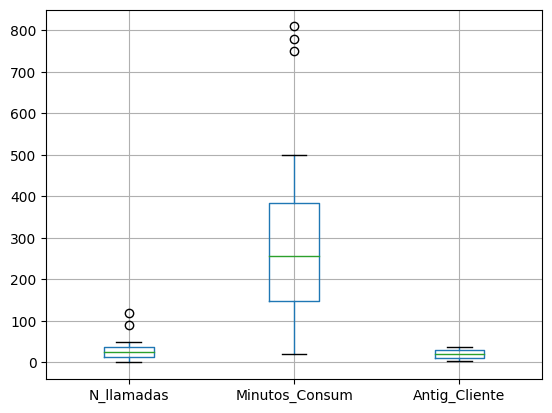

In [ ]:
mov2.boxplot()
outliers = mov2["Minutos_Consum"][np.abs(mov2["Minutos_Consum"] - mov2["Minutos_Consum"].mean()) > 3 * mov2["Minutos_Consum"].std()]
print(outliers)

#### Manualmente

In [ ]:
Q3 = np.percentile(mov2["Minutos_Consum"], 75)
Q1 = np.percentile(mov2["Minutos_Consum"], 25)
RIC = Q3 - Q1
LS = Q3 + 1.5 * RIC
LI = Q1 - 1.5 * RIC

print(LI, LS)

-208.875 740.125


In [ ]:
flag_atip = np.where((mov2["Minutos_Consum"] > LI) & (mov2["Minutos_Consum"] < LS), 0, 1)
df = pd.concat([mov2, pd.Series(flag_atip, name="Flag_Atip")], axis=1)
print(df[df["Flag_Atip"] == 1])

     N_llamadas  Minutos_Consum  Antig_Cliente  Flag_Atip
0            28             750              3          1
633           5             780             34          1
647           1             810             36          1


#### Distancia de Mahalanobis

In [ ]:
from sklearn.covariance import MinCovDet

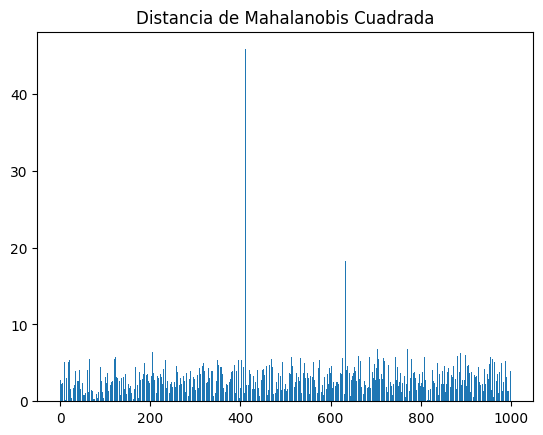

In [ ]:
# Distancia de Mahalanobis
cm = np.mean(mov2, axis=0)
S = MinCovDet().fit(mov2).covariance_
dm_squared = np.apply_along_axis(lambda x: np.dot(x - cm, np.linalg.solve(S, x - cm)), axis=1, arr=mov2.values)

# Gráfico de barras para visualizar la distancia de Mahalanobis cuadrada
plt.bar(range(len(dm_squared)), dm_squared)
plt.title("Distancia de Mahalanobis Cuadrada")
plt.show()

In [ ]:
# Encontrar el índice del valor máximo en la distancia de Mahalanobis cuadrada
max_index_squared = np.argmax(dm_squared)
print("Índice del valor máximo en la distancia de Mahalanobis cuadrada:", max_index_squared)

Índice del valor máximo en la distancia de Mahalanobis cuadrada: 411


## Transformacion

In [ ]:
mov = pd.read_csv("movil_cl.csv", sep=";", decimal=".")
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1000 non-null   int64  
 1   Sexo            991 non-null    object 
 2   Estado_Civil    984 non-null    object 
 3   nse             1000 non-null   object 
 4   N_llamadas      989 non-null    float64
 5   Minutos_Consum  990 non-null    float64
 6   Antig_Cliente   993 non-null    float64
 7   Plan            1000 non-null   int64  
 8   Producto        1000 non-null   object 
 9   Flag_Comp       1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
movcl = mov.dropna()
movcl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              951 non-null    int64  
 1   Sexo            951 non-null    object 
 2   Estado_Civil    951 non-null    object 
 3   nse             951 non-null    object 
 4   N_llamadas      951 non-null    float64
 5   Minutos_Consum  951 non-null    float64
 6   Antig_Cliente   951 non-null    float64
 7   Plan            951 non-null    int64  
 8   Producto        951 non-null    object 
 9   Flag_Comp       951 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 81.7+ KB


In [ ]:
mov_t = movcl.iloc[:, [4, 5, 6, 9]]
mov_t.head()

,N_llamadas,Minutos_Consum,Antig_Cliente,Flag_Comp
0,28.0,750.0,3.0,0
1,4.0,324.0,14.0,1
2,20.0,101.0,9.0,0
3,14.0,141.0,29.0,0
4,6.0,57.0,8.0,0


### Z-score

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
zmov_t = pd.DataFrame(StandardScaler().fit_transform(mov_t.iloc[:, :-1]), columns=mov_t.columns[:-1])
print(zmov_t.head())

   N_llamadas  Minutos_Consum  Antig_Cliente
0    0.187058        3.424713      -1.682420
1   -1.435674        0.413729      -0.587497
2   -0.353853       -1.162443      -1.085189
3   -0.759536       -0.879722       0.905580
4   -1.300446       -1.473437      -1.184728


### Min-Max

In [ ]:
mm_mov_t = pd.DataFrame(MinMaxScaler().fit_transform(mov_t.iloc[:, :-1]), columns=mov_t.columns[:-1])
print(mm_mov_t.describe())

       N_llamadas  Minutos_Consum  Antig_Cliente
count  951.000000      951.000000     951.000000
mean     0.210279        0.310715       0.512188
std      0.123314        0.179185       0.304595
min      0.000000        0.000000       0.000000
25%      0.108333        0.162025       0.242424
50%      0.208333        0.302532       0.515152
75%      0.308333        0.470253       0.787879
max      1.000000        1.000000       1.000000


### Escalamiento decimal

In [ ]:
ed_mov_t = pd.DataFrame(mov_t.apply(lambda x: (x - x.min()) / (x.max() - x.min())), columns=mov_t.columns[:-1])
print(ed_mov_t.head())

   N_llamadas  Minutos_Consum  Antig_Cliente
0    0.233333        0.924051       0.000000
1    0.033333        0.384810       0.333333
2    0.166667        0.102532       0.181818
3    0.116667        0.153165       0.787879
4    0.050000        0.046835       0.151515


### Sigmoidal

In [ ]:
sig_mov_t = pd.DataFrame(np.tanh(mov_t.iloc[:, :-1]), columns=mov_t.columns[:-1])
print(sig_mov_t.head())

   N_llamadas  Minutos_Consum  Antig_Cliente
0    1.000000             1.0       0.995055
1    0.999329             1.0       1.000000
2    1.000000             1.0       1.000000
3    1.000000             1.0       1.000000
4    0.999988             1.0       1.000000


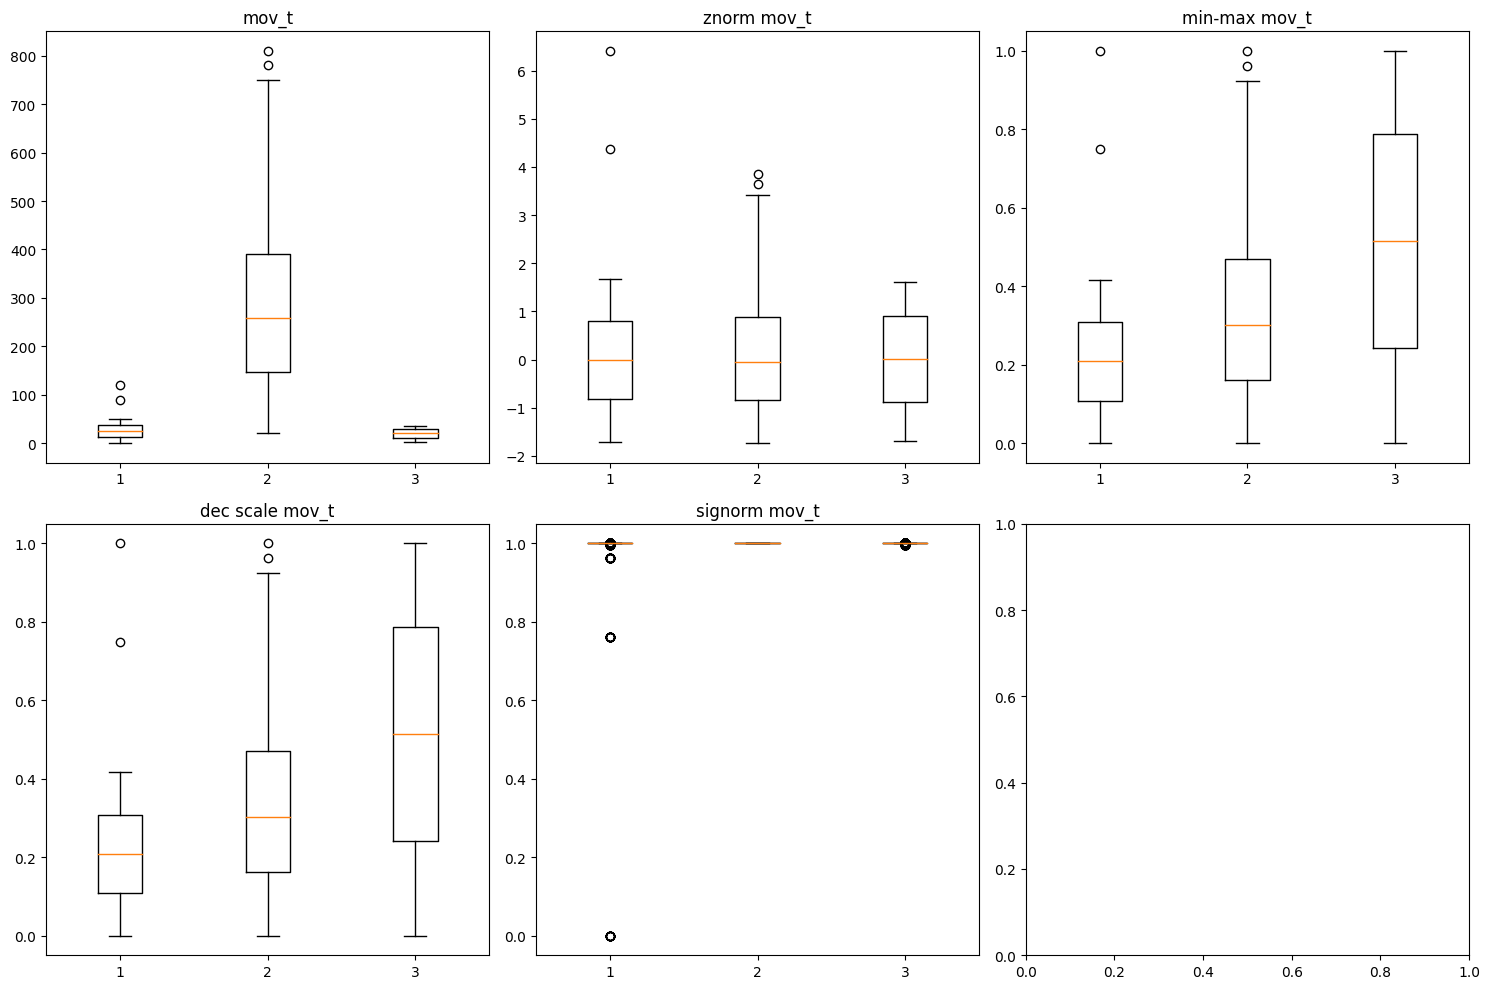

In [ ]:
import matplotlib.pyplot as plt

# Grafico de comparacion
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Boxplot para mov_t
axes[0, 0].boxplot(mov_t.iloc[:, :3].values)
axes[0, 0].set_title("mov_t")

# Boxplot para znorm mov_t
axes[0, 1].boxplot(zmov_t.iloc[:, :3].values)
axes[0, 1].set_title("znorm mov_t")

# Boxplot para min-max mov_t
axes[0, 2].boxplot(mm_mov_t.iloc[:, :3].values)
axes[0, 2].set_title("min-max mov_t")

# Boxplot para dec scale mov_t
axes[1, 0].boxplot(ed_mov_t.iloc[:, :3].values)
axes[1, 0].set_title("dec scale mov_t")

# Boxplot para signorm mov_t
axes[1, 1].boxplot(sig_mov_t.iloc[:, :3].values)
axes[1, 1].set_title("signorm mov_t")

# Ajustar el diseño
fig.tight_layout()

# Mostrar el gráfico
plt.show()

### Discretización

In [ ]:
ncat = 8
movcl["N_llamadas_cat"] = pd.cut(movcl["N_llamadas"], bins=ncat, labels=False)
print(movcl["N_llamadas_cat"].value_counts())

2    298
1    296
0    281
3     74
5      1
7      1
Name: N_llamadas_cat, dtype: int64


<ipython-input-31-f126bc35105e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movcl["N_llamadas_cat"] = pd.cut(movcl["N_llamadas"], bins=ncat, labels=False)


### Intervalo de igual frecuencia

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
kbins = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')
movcl["N_llamadas_cat_f"] = kbins.fit_transform(movcl[["N_llamadas"]])
print(movcl["N_llamadas_cat_f"].value_counts())

2.0    297
1.0    290
0.0    268
3.0     94
6.0      1
7.0      1
Name: N_llamadas_cat_f, dtype: int64


<ipython-input-33-5c5dbd1d1643>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movcl["N_llamadas_cat_f"] = kbins.fit_transform(movcl[["N_llamadas"]])


### Intervalos predefinidos

In [ ]:
cut_points = [0, 30, 50, 80, 120, np.inf]
movcl["N_llamadas_cat_predef"] = pd.cut(movcl["N_llamadas"], bins=cut_points, right=False)
print(movcl["N_llamadas_cat_predef"].value_counts())

[0.0, 30.0)      558
[30.0, 50.0)     371
[50.0, 80.0)      20
[80.0, 120.0)      1
[120.0, inf)       1
Name: N_llamadas_cat_predef, dtype: int64


<ipython-input-34-d25aca343948>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movcl["N_llamadas_cat_predef"] = pd.cut(movcl["N_llamadas"], bins=cut_points, right=False)


### Discretización por entropía

In [ ]:
!pip install mdlp-discretization -q

In [ ]:
from mdlp.discretization import MDLP

In [ ]:
# Discretización por entropía usando MDLP
X_mov_t = mov_t.iloc[:, :-1]  # Características (X)
y_mov_t = mov_t.iloc[:, -1]   # Etiquetas (y)

mdlp_transformer = MDLP()
de_mov_t = pd.DataFrame(mdlp_transformer.fit_transform(X_mov_t, y_mov_t), columns=X_mov_t.columns)
print(de_mov_t.apply(lambda x: len(np.unique(x))))

N_llamadas        1
Minutos_Consum    1
Antig_Cliente     1
dtype: int64


### Discretización por chiMerge

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Discretización con chiMerge
X_chi_mov_t = mov_t.iloc[:, :-1]  # Características (X)
y_chi_mov_t = mov_t.iloc[:, -1]   # Etiquetas (y)

# Aplicar chi2 para seleccionar características
selector = SelectKBest(chi2, k='all')
X_chi2 = selector.fit_transform(X_chi_mov_t, y_chi_mov_t)

# Crear DataFrame con las características seleccionadas
dchi_mov_t = pd.DataFrame(X_chi2, columns=X_chi_mov_t.columns[selector.get_support()])

# Mostrar resultados
print(dchi_mov_t.apply(lambda x: len(np.unique(x))))

N_llamadas         53
Minutos_Consum    421
Antig_Cliente      34
dtype: int64
